<a href="https://colab.research.google.com/github/viktoruebelhart/analyzing-financial-fraud/blob/main/analyzing_financial_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project is dedicated to building a robust solution for detecting fraudulent activities. By developing and implementing advanced analytical techniques, the project aims to identify suspicious patterns and irregularities that may indicate fraudulent behavior. The ultimate goal is to create a reliable system that can flag potentially fraudulent transactions or activities, enhancing security and supporting proactive measures against fraud.

Key stages of the process include:

*  Conducting exploratory data analysis
*  Analyzing correlations
*  Engineering features
*  Building and training models
*  Assessing model performance

dataset:
https://drive.google.com/file/d/1zjK8zQK5zvhR_r2chWI5dCjeOwASlPfb/view?usp=sharing

# Importing the dataset

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import asarray

from datetime import datetime as dt
from datetime import timedelta as td

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Feature importance
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Alura/fraud_detection_dataset.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


- step - indicates the total time passed in hours from the start of the simulation, ranging between 1 and 744 (representing a 30-day period).

- type - specifies the type of transaction, such as deposit, withdrawal, debit, payment, or transfer.

- amount - reflects the total value involved in the transaction.

- nameOrig - identifies the customer who initiated the transaction.

- oldbalanceOrg - shows the account balance of the initiating party before the transaction occurred.

- newbalanceOrig - shows the updated balance of the origin account after the transaction.

- nameDest - refers to the intended recipient or target of the transaction.

- oldbalanceDest - captures the balance of the recipient's account prior to the transaction.

- newbalanceDest - displays the balance of the destination account after the transaction.

- isFraud - indicates if the transaction is classified as fraudulent. In this scenario, fraud is assumed to occur when a user’s account is accessed and drained through transfers, followed by a withdrawal from the destination account.

- isFlaggedFraud - marked by the bank as potential fraud if the transaction attempts to transfer an amount exceeding 200,000.

##Exploratory Data Analysis (EDA)


##check the information in our dataset and analyze classification and fulfillment

In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


There isn't any null value in the dataset

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [9]:
percentage_frau = df['isFraud'].value_counts(normalize=True) * 100
percentage_frau

,proportion
isFraud,
0,99.870918
1,0.129082


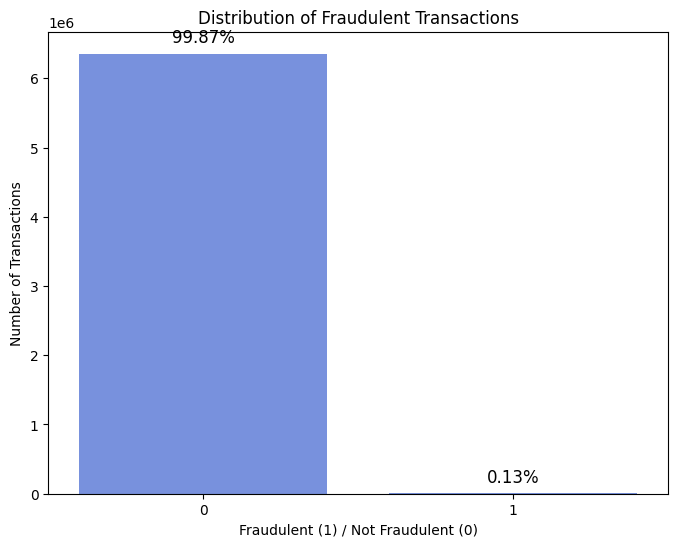

In [10]:
# Calculate the percentage of fraudulent transactions
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(8, 6))
sns.set_palette("coolwarm")
ax = sns.countplot(x='isFraud', data=df)

# Customize title and axis labels
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent (1) / Not Fraudulent (0)')
plt.ylabel('Number of Transactions')

# Add percentage labels to the bars
for p, percentage in zip(ax.patches, fraud_percentage):
    ax.annotate(f'{percentage:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=12,
                color='black')

plt.show()

Based on the analysis, the percentage of fraudulent transactions (isFraud) is very low, with only 0.13% of transactions marked as fraud, while 99.87% are non-fraudulent. This highly imbalanced distribution suggests a significant class imbalance, which can impact the performance of any predictive models trained on this data.

Let's begin by evaluating the effectiveness of the bank's fraud detection engine.
We started by examining the total fraud referrals that were conducted.

In [11]:
# Analyze the effectiveness of the bank's fraud detection system.
# Calculate how many fraudulent transactions were correctly identified by the bank.

true_positives = len(df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 1)])
false_negatives = len(df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 0)])
total_fraudulent = len(df[df['isFraud'] == 1])

bank_accuracy = (true_positives / total_fraudulent) * 100

print(f"Number of True Positives: {true_positives}")
print(f"Number of False Negatives: {false_negatives}")
print(f"Total Fraudulent Transactions: {total_fraudulent}")
print(f"Bank Accuracy in identifying fraud: {bank_accuracy:.2f}%")

Number of True Positives: 16
Number of False Negatives: 8197
Total Fraudulent Transactions: 8213
Bank Accuracy in identifying fraud: 0.19%


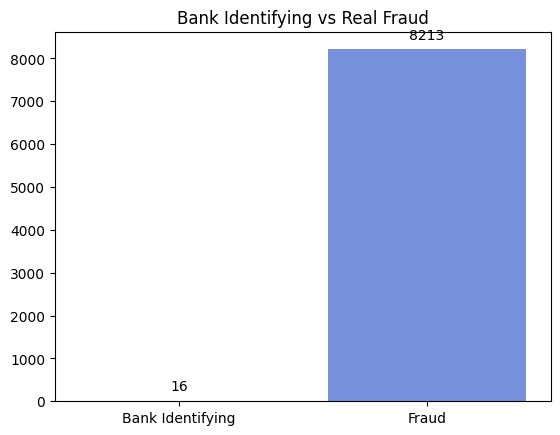

In [12]:
ax = sns.barplot(x=['Bank Identifying', 'Fraud'],
                 y=[df.isFlaggedFraud.sum(), df.isFraud.sum()])
plt.title('Bank Identifying vs Real Fraud')

# Add count labels on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.show()

The bank's fraud detection engine shows a low accuracy in identifying fraudulent transactions, with only 16 true positives out of 8,213 total fraudulent transactions. This results in a significant number of false negatives (8,197), where fraud went undetected. Consequently, the bank's accuracy in detecting fraud is just 0.19%, indicating that the current detection system may require substantial improvements to effectively identify and mitigate fraudulent activity.

##Fraud analysis over time

In [13]:
#Fraud over Step time
fraud_counts = df[df['isFraud'] == 1].groupby('step').size()
fraud_counts

,0
step,
1,16
2,8
3,4
4,10
5,6
...,...
739,10
740,6
741,22


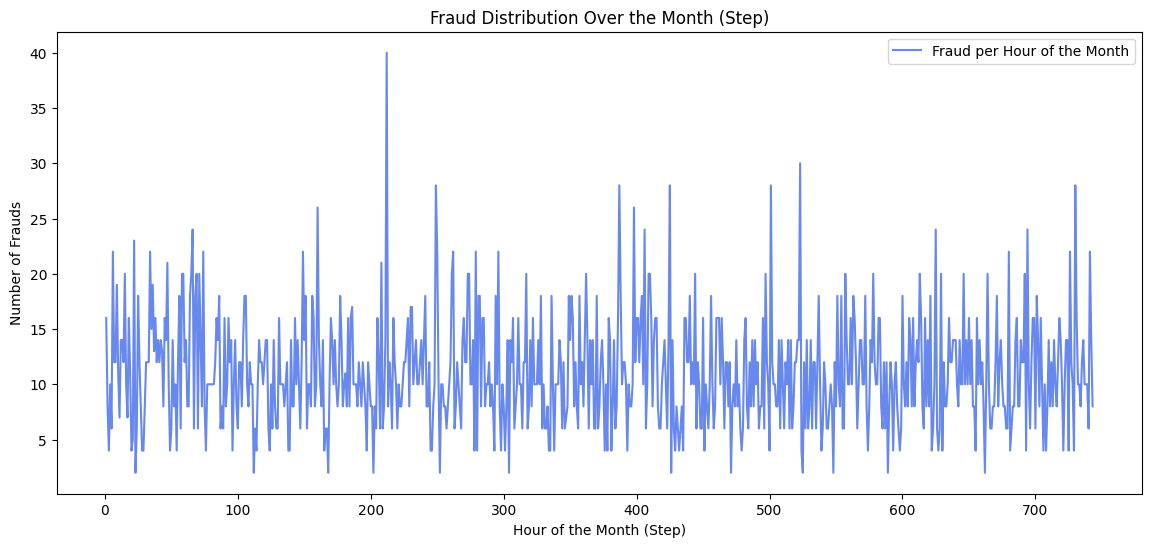

In [14]:
# Plot fraud_counts (fraud per each hour of the month)
plt.figure(figsize=(14, 6))
plt.plot(fraud_counts.index, fraud_counts.values, label="Fraud per Hour of the Month")
plt.xlabel('Hour of the Month (Step)')
plt.ylabel('Number of Frauds')
plt.title('Fraud Distribution Over the Month (Step)')
plt.legend()
plt.show()

In [15]:
# Get the top 5 hours with the highest fraud counts
top_5_fraud_counts = fraud_counts.nlargest(5)

# Display the top 5 hours
print("Top 5 Hours with Highest Fraud Counts:")
print(top_5_fraud_counts)

Top 5 Hours with Highest Fraud Counts:
step
212    40
523    30
249    28
387    28
425    28
dtype: int64


In [16]:
# Calculates fraud count for each hour of the day (0 to 23)
fraud_counts_by_hour = df[df['isFraud'] == 1].groupby(df['step'] % 24).size()

# Show results
fraud_counts_by_hour

,0
step,
0,300
1,358
2,372
3,326
4,274
5,366
6,358
7,328
8,368


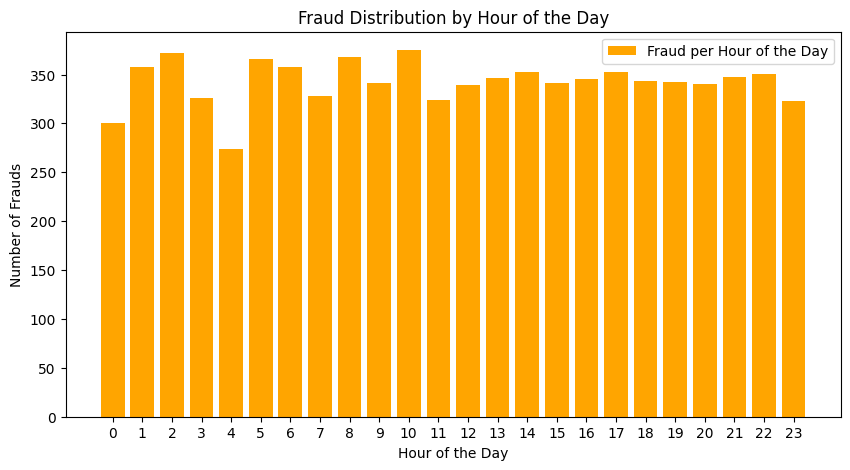

In [17]:
# Plot fraud_counts_by_hour (fraud per each hour of the day)
plt.figure(figsize=(10, 5))
plt.bar(fraud_counts_by_hour.index, fraud_counts_by_hour.values, color='orange', label="Fraud per Hour of the Day")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Frauds')
plt.title('Fraud Distribution by Hour of the Day')
plt.xticks(range(24))  # Sets the x-axis to show all hours of the day (0 to 23)
plt.legend()
plt.show()

In [18]:
# Get the top 5 hours with the highest fraud counts by hour
top_5_fraud_counts_by_hour = fraud_counts_by_hour.nlargest(5)

# Display the top 5 hours
print("Top 5 Hours with Highest Fraud Counts:")
print(top_5_fraud_counts_by_hour)

Top 5 Hours with Highest Fraud Counts:
step
10    375
2     372
8     368
5     366
1     358
dtype: int64


Based on the analysis of the top 5 hours with the highest fraud counts, it is evident that there is limited variation in fraud occurrences across different hours of the day. The highest counts are clustered closely, with only a small numerical difference between the top entries. This suggests that certain hours, such as 10, 2, and 8, experience slightly elevated fraud activity, but overall, the distribution does not show significant spikes or fluctuations.

This consistent pattern indicates that fraud attempts may be occurring throughout the day rather than being concentrated in specific high-risk periods.

## Distribution of the number of operations

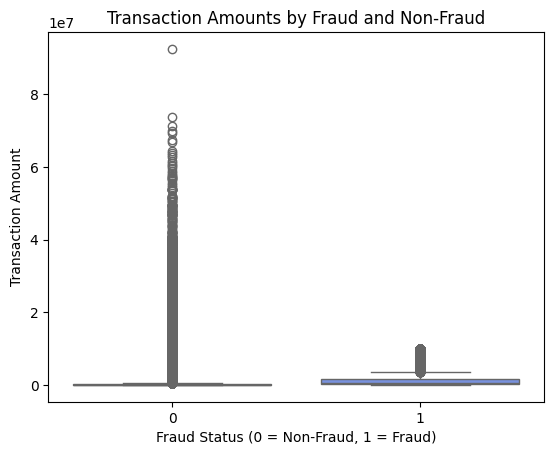

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the transaction amount divided by fraud/non-fraud
sns.boxplot(data=df, x='isFraud', y='amount')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amounts by Fraud and Non-Fraud')
plt.show()

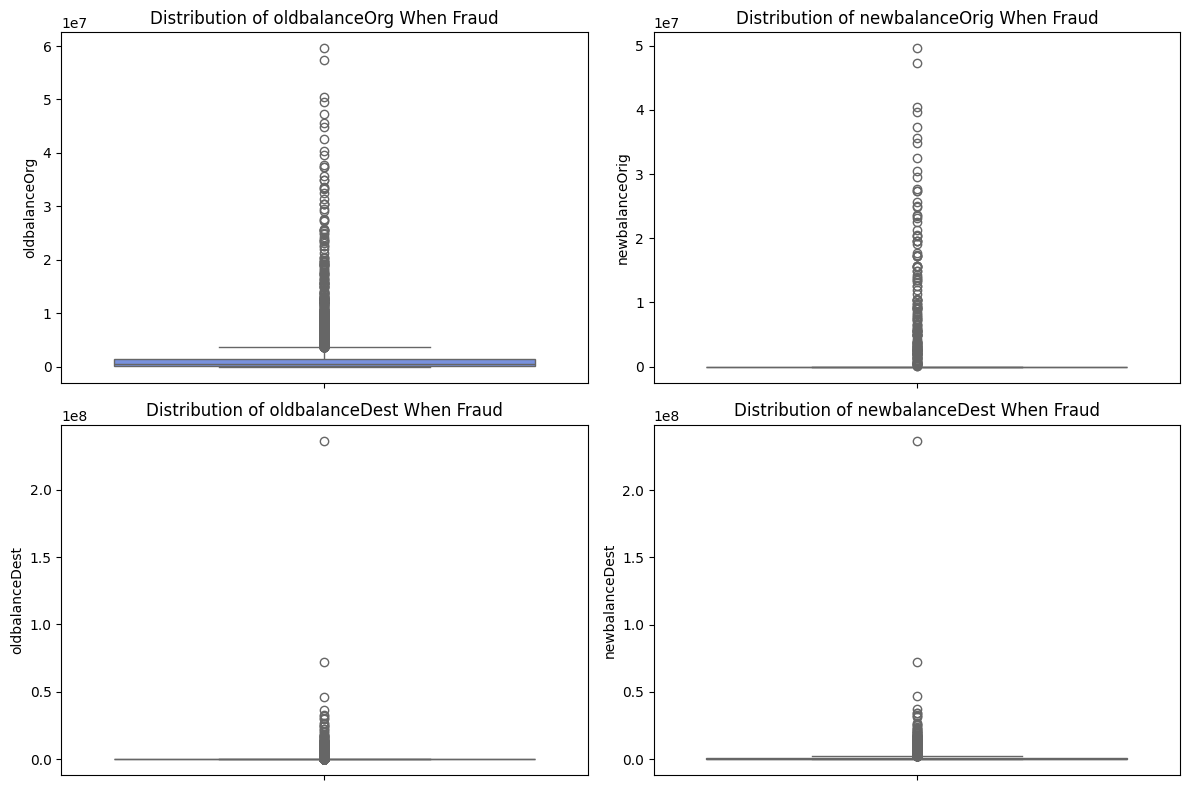

In [21]:
# Checking distribution of source and destination accounts when FRAUD
features_counts = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

fig = plt.figure(figsize=(12, 8))

for i, column in enumerate(features_counts):
    ax = fig.add_subplot(2, 2, i + 1)  # Use enumerate to get the index
    sns.boxplot(data=df[df.isFraud == 1], y=column, )  # Use y=column to set the y-axis
    ax.set_title(f'Distribution of {column} When Fraud')  # Add title for clarity

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [22]:
# Filter only fraudulent transactions
fraudulent_transactions = df[df['isFraud'] == 1]

In [23]:
# Descriptive statistics for amount
amount_stats_amount = fraudulent_transactions['amount'].describe()
print("Descriptive Statistics for Amount in Fraudulent Transactions:")
print(amount_stats_amount)

Descriptive Statistics for Amount in Fraudulent Transactions:
count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64


In [24]:
# Descriptive statistics for balances
balance_stats = fraudulent_transactions[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe()

print("\nDescriptive Statistics for Balances in Fraudulent Transactions:")
print(balance_stats)


Descriptive Statistics for Balances in Fraudulent Transactions:
       oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
count   8.213000e+03    8.213000e+03    8.213000e+03    8.213000e+03
mean    1.649668e+06    1.923926e+05    5.442496e+05    1.279708e+06
std     3.547719e+06    1.965666e+06    3.336421e+06    3.908817e+06
min     0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00
25%     1.258224e+05    0.000000e+00    0.000000e+00    0.000000e+00
50%     4.389835e+05    0.000000e+00    0.000000e+00    4.676420e+03
75%     1.517771e+06    0.000000e+00    1.478287e+05    1.058725e+06
max     5.958504e+07    4.958504e+07    2.362305e+08    2.367265e+08


Overall Conclusions

High-value Transactions: The data indicates that fraudulent transactions often involve high amounts of money, suggesting that fraudsters are targeting substantial sums.

Variability: The high standard deviations across amounts and balances indicate a diverse range of behaviors and strategies in fraudulent transactions.

Impact on Origin Accounts: The analysis suggests that the balances in origin accounts are significantly impacted post-transaction, with funds being drained as part of the fraudulent activities.

Targeting of Accounts: The data indicates that accounts with high balances are frequently targeted, both for withdrawals and transfers.

Potential for Multiple Transactions: The wide range of transaction amounts and balances implies that fraudsters may employ various tactics, possibly conducting multiple smaller transactions alongside larger ones to evade detection.

##Analyze transaction types